In [4]:
import pandas as pd
import os
import csv
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from scipy import random
from lmfit.models import GaussianModel
import scipy.stats as st
import numpy.linalg as npl
from easydict import EasyDict

In [5]:
mainpath = "C:/Users/marce/Python"
filename = "Analisis/Data.csv"
fullpath = os.path.join(mainpath,filename)

In [6]:
data = pd.read_csv(fullpath)
data.head()

,Tiempo,Extensión,Carga,Tiempo.1,Extensión.1,Carga.1,Tiempo.2,Extensión.2,Carga.2,Tiempo.3,Extensión.3,Carga.3,Tiempo.4,Extensión.4,Carga.4,Tiempo.5,Extensión.5,Carga.5
0,0.0,0.00000,-0.00288,0.1,0.00187,-0.00367,0.0,0.00000,-0.00477,0.0,0.00000,0.00062,0.0,0.00000,-0.00629,0.0,0.00000,-0.00128
1,0.1,0.00229,-0.00118,0.2,0.00896,0.00317,0.1,0.00271,-0.00450,0.1,0.00146,0.00133,0.1,0.00167,-0.00644,0.1,0.00250,-0.00141
2,0.2,0.00937,0.00647,0.3,0.01917,0.01499,0.2,0.00958,-0.00085,0.2,0.01062,0.00728,0.2,0.00833,-0.00210,0.2,0.01250,0.00668
3,0.3,0.01937,0.01917,0.4,0.02937,0.02670,0.3,0.01958,0.01137,0.3,0.02187,0.01859,0.3,0.01854,0.00853,0.3,0.02292,0.01729
4,0.4,0.02937,0.03354,0.5,0.03917,0.03905,0.4,0.02958,0.02150,0.4,0.03187,0.02704,0.4,0.02896,0.02098,0.4,0.03229,0.02927


In [7]:
data.describe()

,Tiempo,Extensión,Carga,Tiempo.1,Extensión.1,Carga.1,Tiempo.2,Extensión.2,Carga.2,Tiempo.3,Extensión.3,Carga.3,Tiempo.4,Extensión.4,Carga.4,Tiempo.5,Extensión.5,Carga.5
count,36165.000000,37908.000000,40625.000000,40625.000000,40625.000000,39724.000000,39724.000000,39724.000000,37908.000000,37908.000000,36623.000000,36860.000000,36860.000000,36860.000000,36623.000000,36623.000000,36165.000000,36165.000000
mean,1808.200000,314.050187,293.538098,1633.517948,296.189017,208.488185,1662.913589,301.748983,32.895440,1727.018115,194.312224,45.959559,1776.643636,193.366078,24.000424,1786.173048,150.683446,21.161447
std,1044.008058,749.071604,974.686064,1104.589566,726.637328,806.282123,1099.338498,733.882337,61.697093,1084.704439,397.218855,293.793625,1059.012478,396.114392,34.097270,1055.762520,87.000656,13.501177
min,0.000000,0.000000,-0.002880,0.100000,0.001870,-0.003670,0.000000,0.000000,-0.004770,0.000000,0.000000,0.000620,0.000000,0.000000,-0.006440,0.000000,0.000000,-0.001410
25%,904.100000,78.972645,9.720820,569.700000,62.000200,9.167022,637.175000,67.624155,8.921685,773.375000,76.296030,8.431640,851.975000,74.815038,8.287760,869.750000,75.341870,8.756880
50%,1808.200000,157.945820,21.314710,1585.300000,146.633320,19.926455,1630.250000,150.380715,19.381965,1721.050000,152.591860,17.959280,1773.450000,151.604350,19.205000,1785.300000,150.683320,19.652810
75%,2712.300000,236.918777,35.073800,2600.900000,231.266430,32.973515,2623.325000,233.136290,31.748970,2668.725000,228.887785,29.560480,2694.925000,228.393838,32.400995,2700.850000,226.025390,32.780810
max,3616.398000,3790.758000,4062.326000,3616.500000,3790.700000,3972.242000,3616.400000,3790.700000,315.891630,3616.400000,3662.184000,3685.892000,3616.400000,3662.200000,305.183720,3616.400000,301.366420,46.559040


In [8]:
data.dtypes

Tiempo         float64
Extensión      float64
Carga          float64
Tiempo.1       float64
Extensión.1    float64
Carga.1        float64
Tiempo.2       float64
Extensión.2    float64
Carga.2        float64
Tiempo.3       float64
Extensión.3    float64
Carga.3        float64
Tiempo.4       float64
Extensión.4    float64
Carga.4        float64
Tiempo.5       float64
Extensión.5    float64
Carga.5        float64
dtype: object

In [9]:
pd.isnull(data["Carga.1"]).values.ravel().sum()

901

In [10]:
pd.notnull(data["Extensión"]).values.ravel().sum()

37908

# Borrado de columnas de "Tiempo"

In [11]:
data1 =data
data1 =data1.drop(["Tiempo", "Tiempo.1", "Tiempo.2", "Tiempo.3","Tiempo.4","Tiempo.5"],axis=1)
data1.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


In [12]:
account_lenght = data1[["Extensión","Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.5"]]
account_lenght.head()
data2 = data1[data1["Extensión"]<3610]
data2.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


# Plot y visualización

In [13]:
Carga1= data2["Carga"]
Carga1.head()

0   -0.00288
1   -0.00118
2    0.00647
3    0.01917
4    0.03354
Name: Carga, dtype: float64

In [14]:
type(Carga1)

pandas.core.series.Series

In [15]:
subset = data2[["Extensión", "Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.1", "Extensión.5", "Carga.5"]]

In [16]:
subset1 = data2[["Extensión", "Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.1", "Extensión.5", "Carga.5"]][:50]
subset1.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.1,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00367,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,0.00317,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.01499,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.02670,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.03905,0.03229,0.02927


In [17]:
data2.iloc[:10 , 3:6]
data2.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


In [18]:
data2.shape

(36165, 12)

In [19]:
data3 = data2
data3 = data2[data2["Extensión"]<3616]
data3.tail()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
36160,301.33389,42.56761,301.34183,42.46901,301.33496,42.67854,301.33371,41.36115,301.33371,45.64490,301.33328,46.55358
36161,301.34183,42.56017,301.34976,42.47063,301.34308,42.67968,301.34204,41.36227,301.34204,45.64412,301.34204,46.55541
36162,301.34976,42.55069,301.35806,42.47103,301.35123,42.68026,301.35059,41.36363,301.34998,45.64540,301.35037,46.55795
36163,301.35828,42.54178,301.36682,42.47355,301.35974,42.68284,301.35892,41.36505,301.35828,45.64692,301.35849,46.55843
36164,301.37143,24.07120,301.37558,42.47486,301.36807,42.68416,301.36682,41.36612,301.36682,45.64821,301.36642,46.55904


In [20]:
data3["Esfuerzo.1 (GPa)"] = (data2["Carga"]*9.8)/30
data3["Def.1 (mm/mm)"] = data2["Extensión"]/56.7
data3["Esfuerzo.2 (GPa)"] = (data2["Carga.1"]*9.8)/30
data3["Def.2 (mm/mm)"] = data2["Extensión.1"]/60.6
data3["Esfuerzo.3 (GPa)"] = (data2["Carga.2"]*9.8)/30
data3["Def.3 (mm/mm)"] = data2["Extensión.2"]/58.3
data3["Esfuerzo.4 (GPa)"] = (data2["Carga.3"]*9.8)/30
data3["Def.4 (mm/mm)"] = data2["Extensión.3"]/55.8
data3["Esfuerzo.5 (GPa)"] = (data2["Carga.4"]*9.8)/30
data3["Def.5 (mm/mm)"] = data2["Extensión.4"]/53.2
data3["Esfuerzo.6 (GPa)"] = (data2["Carga.5"]*9.8)/30
data3["Def.6 (mm/mm)"] = data2["Extensión.5"]/53.1

In [21]:
data3["Esfuerzo.1 (GPa)"].head()
data3["Def.1 (mm/mm)"].head() 
data3["Esfuerzo.2 (GPa)"].head()
data3["Def.2 (mm/mm)"].head()
data3["Esfuerzo.3 (GPa)"].head()
data3["Def.3 (mm/mm)"].head()
data3["Esfuerzo.4 (GPa)"].head()
data3["Def.4 (mm/mm)"].head()
data3["Esfuerzo.5 (GPa)"].head()
data3["Def.5 (mm/mm)"].head()
data3["Esfuerzo.6 (GPa)"].head()
data3["Def.6 (mm/mm)"].head()

0    0.000000
1    0.000047
2    0.000235
3    0.000432
4    0.000608
Name: Def.6 (mm/mm), dtype: float64

# Eliminar Cargas y Extensiones

In [22]:
data4 =data3.drop(subset1,axis=1)
data4.head()

,Esfuerzo.1 (GPa),Def.1 (mm/mm),Esfuerzo.2 (GPa),Def.2 (mm/mm),Esfuerzo.3 (GPa),Def.3 (mm/mm),Esfuerzo.4 (GPa),Def.4 (mm/mm),Esfuerzo.5 (GPa),Def.5 (mm/mm),Esfuerzo.6 (GPa),Def.6 (mm/mm)
0,-0.000941,0.000000,-0.001199,0.000031,-0.001558,0.000000,0.000203,0.000000,-0.002055,0.000000,-0.000418,0.000000
1,-0.000385,0.000040,0.001036,0.000148,-0.001470,0.000046,0.000434,0.000026,-0.002104,0.000031,-0.000461,0.000047
2,0.002114,0.000165,0.004897,0.000316,-0.000278,0.000164,0.002378,0.000190,-0.000686,0.000157,0.002182,0.000235
3,0.006262,0.000342,0.008722,0.000485,0.003714,0.000336,0.006073,0.000392,0.002786,0.000348,0.005648,0.000432
4,0.010956,0.000518,0.012756,0.000646,0.007023,0.000507,0.008833,0.000571,0.006853,0.000544,0.009562,0.000608


# Gráficas

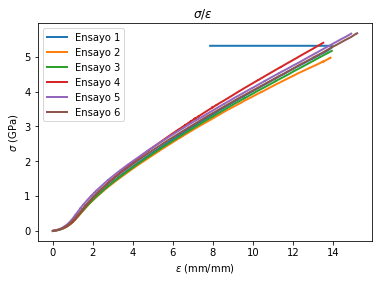

In [23]:
data5 = data4
dataframe1 = data5["Esfuerzo.1 (GPa)"]
dataframe2 = data5["Def.1 (mm/mm)"]
dataframe3 = data5["Esfuerzo.2 (GPa)"]
dataframe4 = data5["Def.2 (mm/mm)"]
dataframe5 = data5["Esfuerzo.3 (GPa)"]
dataframe6 = data5["Def.3 (mm/mm)"]
dataframe7 = data5["Esfuerzo.4 (GPa)"]
dataframe8 = data5["Def.4 (mm/mm)"]
dataframe9 = data5["Esfuerzo.5 (GPa)"]
dataframe10 = data5["Def.5 (mm/mm)"]
dataframe11 = data5["Esfuerzo.6 (GPa)"]
dataframe12= data5["Def.6 (mm/mm)"]

plt.plot(dataframe1, dataframe2, linewidth=2, label="Ensayo 1")
plt.plot(dataframe3, dataframe4, linewidth=2, label="Ensayo 2")
plt.plot(dataframe5, dataframe6, linewidth=2, label="Ensayo 3")
plt.plot(dataframe7, dataframe8, linewidth=2, label="Ensayo 4")
plt.plot(dataframe9, dataframe10, linewidth=2, label="Ensayo 5")
plt.plot(dataframe11, dataframe12, linewidth=2, label="Ensayo 6")

plt.xlabel("$\\epsilon$ (mm/mm)")
plt.ylabel("$\\sigma$ (GPa)")
plt.legend()
plt.title("$\\sigma$/$\\epsilon$  ")
plt.show()

In [24]:
data5["$\\sigma$ Promedio"] = (data5["Esfuerzo.1 (GPa)"] + data5["Esfuerzo.2 (GPa)"] + data5["Esfuerzo.3 (GPa)"] +data5["Esfuerzo.4 (GPa)"] + data5["Esfuerzo.6 (GPa)"])/6
data5["$\\epsilon$ Promedio"] = (data5["Def.1 (mm/mm)"] + data5["Def.2 (mm/mm)"] + data5["Def.3 (mm/mm)"] +data5["Def.4 (mm/mm)"] + data5["Def.5 (mm/mm)"]+ data5["Def.6 (mm/mm)"])/6  


In [25]:
data5["$\\sigma$ Promedio"].head()
data5["$\\epsilon$ Promedio"].head()


0    0.000005
1    0.000057
2    0.000205
3    0.000389
4    0.000566
Name: $\epsilon$ Promedio, dtype: float64

In [26]:
data5 = data5 =data5.iloc[:,[12,13]]

In [27]:
data6 = data5

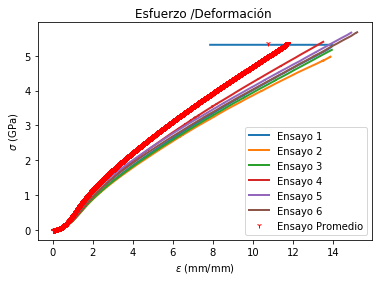

In [28]:
data5 = data4
dataframe1 = data5["Esfuerzo.1 (GPa)"]
dataframe2 = data5["Def.1 (mm/mm)"]
dataframe3 = data5["Esfuerzo.2 (GPa)"]
dataframe4 = data5["Def.2 (mm/mm)"]
dataframe5 = data5["Esfuerzo.3 (GPa)"]
dataframe6 = data5["Def.3 (mm/mm)"]
dataframe7 = data5["Esfuerzo.4 (GPa)"]
dataframe8 = data5["Def.4 (mm/mm)"]
dataframe9 = data5["Esfuerzo.5 (GPa)"]
dataframe10 = data5["Def.5 (mm/mm)"]
dataframe11 = data5["Esfuerzo.6 (GPa)"]
dataframe12= data5["Def.6 (mm/mm)"]

plt.plot(dataframe1, dataframe2, linewidth=2, label="Ensayo 1")
plt.plot(dataframe3, dataframe4, linewidth=2, label="Ensayo 2")
plt.plot(dataframe5, dataframe6, linewidth=2, label="Ensayo 3")
plt.plot(dataframe7, dataframe8, linewidth=2, label="Ensayo 4")
plt.plot(dataframe9, dataframe10, linewidth=2, label="Ensayo 5")
plt.plot(dataframe11, dataframe12, linewidth=2, label="Ensayo 6")

Esfuerzo_promedio  = data5["$\\sigma$ Promedio"]
Deformacion_promedio  = data5["$\\epsilon$ Promedio"]
plt.plot(Esfuerzo_promedio, Deformacion_promedio, "r1", linewidth=0.5, label="Ensayo Promedio")
plt.ylabel("$\\sigma$ (GPa)")
plt.xlabel("$\\epsilon$ (mm/mm)")
plt.legend()
plt.title("Esfuerzo /Deformación ")
plt.show()

In [29]:
data6.head()


,$\sigma$ Promedio,$\epsilon$ Promedio
0,-0.000652,0.000005
1,-0.000141,0.000057
2,0.001882,0.000205
3,0.005070,0.000389
4,0.008188,0.000566


In [30]:
type(data6)

pandas.core.frame.DataFrame

## Exportar en excel resultado

In [31]:
df = pd.DataFrame(data6)
df.to_excel("C:/Users/marce/Python/Analisis/Resultado.xlsx", sheet_name="Esfuerzo-deformación")

In [33]:
def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])
def fun(x, u, y):
    return model(x, u) - y
def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J
u = data5["$\\epsilon$ Promedio"]
y = data5["$\\sigma$ Promedio"]
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)


res.x
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

NameError: name 'x0' is not defined

In [ ]:
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
   d2x = zeros_like(P)
   d2y = zeros_like(P)

   d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
   d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
   d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

   d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
   d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
   d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

   return d2x + d2y + 5*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = root(residual, guess, method='broyden2', options={'disp': True})
#sol = root(residual, guess, method='broyden2', options={'disp': True, 'max_rank': 50})
#sol = root(residual, guess, method='anderson', options={'disp': True, 'M': 10})
print('Residual: %g' % abs(residual(sol.x)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol.x)
plt.colorbar()
plt.show()

In [ ]:
mu, sigma = 0, 1.0 # media y desvio estandar
datos = np.random.normal(mu, sigma, 10000) #creando muestra de datos
x = np.linspace(-4, 4, num=1000)
y = st.norm.pdf(x, 0, 1)


plt.plot(x, y, 'r--', label=("$\\mu$={}, $\\sigma^2$={}".format(mu, sigma)))
plt.legend(loc="upper right") 
plt.show()

In [ ]:
#!/usr/bin/python
#-*- coding: latin-1 -*-
"""This module contains pure Python implementations of the
Levenberg-Marquardt algorithm for data fitting.
"""

import numpy as np

from numpy import inner, max, diag, eye, Inf, dot
from numpy.linalg import norm, solve


import time

def gauss1d(pars, x, v0 = 0):
    """calculate 1d gaussian.
    @return: difference of 1d gaussian and reference (data) values
    @param pars: parameters of gaussian. see source.
    @param x: x values
    @param v0: reference value
    """
    A, m, s, offs = pars[0:4]
    v = A*np.exp(- (x-m)**2 / (2*s**2)) + offs
    return v-v0

def Dgauss1d(pars, x, v=0):
    """
    calculated Jacobian matrix for 1d gauss
    """
    A, m, s, offs = pars[0:4]
    f = A*numpy.exp( - (x-m)**2 / (2*s**2))
    J = np.empty(shape = (4,)+x.shape, dtype = np.float_)
    J[0] = 1.0/A * f
    J[1] = f*(x-m)/s**2
    J[2] = f*(x-m)**2/s**3
    J[3] = 1
    return J

def fJ(pars, x, y = 0):
    "Calculation of function and Jacobian for one-dimensional Gaussian."
    A, m, s, offs = pars[0:4]
    f = A*numpy.exp( - (x-m)**2 / (2*s**2))
    if 1:
        J = numpy.empty(shape = (4,)+x.shape, dtype = numpy.float_)
        J[0] = 1.0/A * f
        J[1] = f*(x-m)/s**2
        J[2] = f*(x-m)**2/s**3
        J[3] = 1
        return f + (offs - y), J
    return f + (offs - y)


def rF(pars, x):
    """calculate all f_i and df_i/dp_j"""
    m, s = pars

    #F: function in parts which are then linearly combined to yield total function
    F = numpy.empty(shape = (2,) + x.shape)
    F[0] = numpy.exp( - (x-m)**2 / (2*s**2))
    F[1] = 1

    Fd = numpy.empty(shape = (2,) + F.shape)
    ##Ableitungen nach nichtlinearen Parametern
    #Fd[0]: Ableitungen der F[i] nach m
    Fd[0][0] = F[0] * (x-m)/(s**2)
    Fd[0][1] = 0

    Fd[1][0] = F[0] * (x-m)**2/(s**3)
    Fd[1][1] = 0

    return F, Fd

def fJr(pars, x, y = 0, calcJ = True):
    """
    calculate f and J for reduced system (only nonlinear parameters)
    """

    F, Fd = rF(pars, x)

    #calculate linear Parameters
    FtF = inner(F, F)
    Fty = inner(F, y)
    c = solve(FtF, Fty)

    #calculate residuum
    r = dot(c, F) - y

    if not calcJ:
        return r, c, F

    ##calculate complete Jacobian
    cd = numpy.empty(shape = (len(pars),) + c.shape)
    Jr = numpy.empty(shape = (len(pars),) + x.shape)
    for j in range(len(pars)):
        cd[j] = solve(FtF, inner(Fd[j], r) - inner(F, dot(c, Fd[j])))
        Jr[j] = dot(c, Fd[j]) + dot(cd[j], F)

    return r, Jr

def fitparerror(fitpar, J, res):
    """
    fitpar: fit parameters
    J: Jacobi matrix
    r: residuum
    """
    import scipy.stats
  
    alpha = 0.05 #confidence level 95% for alpha = 0.05, 2sigma confidence limit
    
    N = max(J.shape) #number of points
    m = len(fitpar) #number of parameters

    rnorm = sum(res*res) #norm residuum
  
    sigma = numpy.sqrt(rnorm/(N - m)) # estimated standard deviation
    
    #R = numpy.linalg.qr(numpy.transpose(J), mode='r') # %QR Zerlegung
    #Rinv = numpy.linalg.inv(R) #R\eye(size(R)); 
    #diagonale = numpy.sum((Rinv*Rinv),1) #diagonal entries of inv(R^T R)

    diagonale = numpy.diagonal( numpy.linalg.inv(numpy.inner(J,J)))

    parerr = numpy.sqrt(diagonale) * sigma * scipy.stats.t.ppf(1-alpha/2, N-m);
    parerrrel = parerr/fitpar #relative error

    return parerr, sigma

    
def LM(fun, pars, args,
       tau = 1e-2, eps1 = 1e-6, eps2 = 1e-6, kmax = 20,
       verbose = False,
       full_output = False):
    """Implementation of the Levenberg-Marquardt algorithm in pure
    Python. Solves the normal equations."""
    p = pars
    f, J = fun(p, *args)

    A = inner(J,J)
    g = inner(J,f)

    I = eye(len(p))

    k = 0; nu = 2
    mu = tau * max(diag(A))
    stop = norm(g, Inf) < eps1
    while not stop and k < kmax:
        k += 1

        try:
            d = solve( A + mu*I, -g)
        except numpy.linalg.LinAlgError:
            print ("Singular matrix encountered in LM")
            stop = True
            reason = 'singular matrix'
            break

        if norm(d) < eps2*(norm(p) + eps2):
            stop = True
            reason = 'small step'
            break

        pnew = p + d

        fnew, Jnew = fun(pnew, *args)
        #rho = (norm(f) - norm(fnew))/inner(d, mu*d - g)  # /2????
        rho = (norm(f)**2 - norm(fnew)**2)/inner(d, mu*d - g)
        
        if rho > 0:
            p = pnew
            A = inner(Jnew, Jnew)
            g = inner(Jnew, fnew)
            f = fnew
            J = Jnew
            if (norm(g, Inf) < eps1): # or norm(fnew) < eps3):
                stop = True
                reason = "small gradient"
                break
            mu = mu * max([1.0/3, 1.0 - (2*rho - 1)**3])
            nu = 2.0
        else:
            mu = mu * nu
            nu = 2*nu

        if verbose:
            print ("step %2d: |f|: %9.6g mu: %8.3g rho: %8.3g"%(k, norm(f), mu, rho))

    else:
        reason = "max iter reached"

    if verbose:
        print (reason)
    
    if not full_output:
        return p
    else:
        return p, J, f #fitparerror(p, J, f)

def LMqr(fun, pars, args,
         tau = 1e-3, eps1 = 1e-8, eps2 = 1e-8, kmax = 100,
         verbose = False):

    from scipy.linalg import lstsq
    import scipy.linalg

    """Implementation of the Levenberg-Marquardt algorithm in pure
    Python. Instead of using the normal equations this version uses QR
    factorization for enhanced accuracy. Significantly slower (factor
    2)."""
    p = pars
    f, J = fun(p, *args)

    A = inner(J,J)
    g = inner(J,f)

    I = eye(len(p))

    k = 0; nu = 2
    mu = tau * max(diag(A))
    stop = norm(g, Inf) < eps1

    while not stop and k < kmax:
        k += 1

        if verbose:
            print ("step %d: |f|: %9.3g mu: %g"%(k, norm(f), mu))

        tic = time.time()
        A = inner(J, J)
        g = inner(J, f)

        d = solve( A + mu*I, -g)
        print ('XX', d, time.time() - tic)

        
        des = numpy.hstack((-f, numpy.zeros((len(p),))))
        Des = numpy.vstack((numpy.transpose(J),
                            numpy.sqrt(mu)*I))

        tic = time.time()
        d0, resids, rank, s = lstsq(Des, des)
        print ('d0', d0, time.time() - tic)

        
        tic = time.time()
        #q, r = scipy.linalg.qr(Des, econ = True, mode = 'qr')
        #d4   = solve(r, inner(numpy.transpose(q), des))
        r = scipy.linalg.qr(Des, econ = True, mode = 'r')
        d4   = scipy.linalg.cho_solve( (r, False), -inner(J, f))
        print ('d4', d4, time.time() - tic)

        
        

        tic = time.time()
        q, r = scipy.linalg.qr(numpy.transpose(J), econ = True, mode = 'qr')
        d3 = solve( r + mu*numpy.linalg.inv(r.transpose()), -inner(numpy.transpose(q),f))
        #d3 = scipy.linalg.cho_solve( (r + mu*numpy.linalg.inv(r.transpose()), False),
        #                             -inner(numpy.transpose(q),f))
        print ('d3', d3, time.time() - tic)

        print (d - d0)
        print (d3 - d0)
        print (d4 - d0)


        if norm(d) < eps2*(norm(p) + eps2):
            stop = True
            reason = 'small step'
            break

        pnew = p + d

        fnew, Jnew = fun(pnew, *args)
        rho = (norm(f) - norm(fnew))/inner(d, mu*d - g) # /2????

        if rho > 0:
            p = pnew
            #A = inner(Jnew, Jnew)
            #g = inner(Jnew, fnew)
            f = fnew
            J = Jnew
            if (norm(g, Inf) < eps1): # or norm(fnew) < eps3):
                stop = True
                reason = "small gradient"
                break
            mu = mu * max(1.0/3, 1 - (2*rho - 1)**3)
            nu = 2
        else:
            mu = mu * nu
            nu = 2*nu

    else:
        reason = "max iter reached"

    if verbose:
        print (reason)
    return p


def testLM():
    #       A   m   s  offs
    pars = [1, 0.1, 1, 0.5]
    
    x = np.linspace(-3,3,1001)
    y = gauss1d(pars, x)

    #y+= numpy.random.randn(len(x))
    #            A   m    s  offs
    startpars = [1*2, 0.5, 2, 0.5]

    return LM(fJ, startpars, (x, y), verbose = True, tau = 1e-4)

def testfLMs():
    x = numpy.linspace(-3,3,1001)
    #       A   m   s  offs
    pars = [1, 0.1, 1, 0.5]
    y = gauss1d(pars, x)

    #           m     s
    startpar = [0.5, 2]

    #f,c,F = fJl(startpar, x, y, calcJ = False)
    #f,J   = fJl(startpar, x, y, calcJ = True)

    #print "c: ", c
    #print "f: ", f
    #print "F: ", F
    #print "J: ", J

    p = LM(fJr, startpar, (x, y), verbose = True, tau = 1e-4)

    print (p)

def testLMqr():
    pars = [1, 0.1, 1, 0.5]
    x = numpy.linspace(-5,5,1000001)
    y = gauss1d(pars, x) # + numpy.random.randn(len(x))

    pars2 = [1.1, 0.15, 1.3, 0.2]

    return LMqr(fJ, pars2, (x, y), verbose = True)



if __name__ == '__main__':
    print (testLM())
    #print '-'*40
    #print testLMqr()

    print (testfLMs())

In [34]:
import numpy as np
import numpy.linalg as npl
from easydict import EasyDict

opts = EasyDict(dict(max_iter=10, eps1=1e-8, eps2=1e-8))

def fJ(x, p, y=0):
    f = p[0] * np.exp(- (x - p[1]) ** 2 / (2 * p[2] ** 2))
    J = np.empty((p.size, x.size), dtype=np.float)
    J[0, :] = f / p[0]
    J[1, :] = f * (x - p[1]) / p[2] ** 2
    J[2, :] = f * (x - p[1]) ** 2 / p[2] ** 3
    J[3, :] = 1
    return f + p[3] - y, J

def lm(func, x, y, p):
    f, J = func(x, p, y)
    A, g = np.inner(J, J), np.inner(J, f)
    I = np.eye(p.size)
    mu = 1e-3 * np.max(np.diag(A))
    v = 2

    k = 0
    while npl.norm(g, np.inf) > opts.eps1 and k < opts.max_iter:
        k += 1
        h = npl.solve(A + mu * I, -g)
        print('k:', k, 'mu:', mu, 'f:', npl.norm(f))
        print('  p:', p, '\n  h:', h)

        if npl.norm(h) <= opts.eps2 * (npl.norm(p) + opts.eps2):
            break

        p2 = p + h
        f2, J2 = func(x, p2, y)
        rho = (npl.norm(f) - npl.norm(f2)) / np.inner(h, mu * h - g)
        print('  rho:', rho)

        if rho > 0:
            p, f, J = p2, f2, J2
            A, g = np.inner(J, J), np.inner(J, f)
            mu *= max(1. / 3, 1 - (2 * rho - 1) ** 3)
            v = 2
        else:
            mu *= v
            v *= 2

    return p


def test():
    x = np.linspace(-3, 3, 1001)
    p_true = np.array([1, 0.1, 1, 0.5])
    y, _ = fJ(x, p_true)
    y += 1e-2 * np.random.randn(x.size)
    p_0 = np.array([1.1, 0.15, 1.3, 0.2])
    p = lm(fJ, x, y, p_0)
    print('final p:', p)


if __name__ == '__main__':
    test()
    
    

k: 1 mu: 1.0010000000000001 f: 4.5715613897666945
  p: [1.1  0.15 1.3  0.2 ] 
  h: [-0.17207317 -0.04983466 -0.3436915   0.35654356]
  rho: 0.17681874231884928
k: 2 mu: 1.2713102813584585 f: 0.9139884581746381
  p: [0.92792683 0.10016534 0.9563085  0.55654356] 
  h: [ 0.0695699  -0.00072383  0.04256686 -0.05414315]
  rho: 0.8178660409501866
k: 3 mu: 0.9446668384285092 f: 0.3054789272998686
  p: [0.99749673 0.09944151 0.99887536 0.50240041] 
  h: [ 2.75688350e-03  1.90811034e-05  2.84549096e-04 -2.46036086e-03]
  rho: 1.6472810786766887
k: 4 mu: 0.31488894614283636 f: 0.3015822452950823
  p: [1.00025361 0.09946059 0.99915991 0.49994005] 
  h: [ 3.50212820e-05 -1.25904464e-07  3.32013607e-05 -3.06369521e-05]
  rho: 1.6580938540014973
k: 5 mu: 0.10496298204761212 f: 0.3015819588842801
  p: [1.00028864 0.09946047 0.99919311 0.49990942] 
  h: [ 1.80050764e-07 -1.53444061e-09  3.26713040e-07 -2.17240713e-07]
  rho: 1.65829561954417
k: 6 mu: 0.03498766068253737 f: 0.30158195887149486
  p: [1.